# Assignment 7: Exploring 3D Sinusoidal Data using Artificial Neural Networks
## DTSC 680: Applied Machine Learning

## Name:

## Directions and Overview

The main purpose of this assignment is for you to gain experience using artificial neural networks to solve simple regression problems.  In this assignment, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.  Your final submission, however, should contain a connected line plot.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def plot3Ddata(data):
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d import Axes3D

    xdata = data['x']
    ydata = data['y']
    zdata = data['z']

    #%matplotlib tk
    #allow us to generate an picture of our work
    #%matplotlib notebook
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize=(16,15))

    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
    ax1.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.view_init(0,89)

    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
    ax2.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_xlabel('X')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.view_init(52, 1)

    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
    ax3.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.view_init(32,87)

    ax4 = fig.add_subplot(2,2,4, projection='3d')
    ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
    ax4.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.view_init(87,-1)

In [5]:
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d import Axes3D

    xdata = data['x']
    ydata = data['y']
    zdata = data['z']

    #%matplotlib tk
    #allow us to generate an picture of our work
    #%matplotlib notebook
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize=(16,15))

    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax1.plot3D(fit_x, fit_y, fit_z, 'black') #this line contains information of the line of fitness for ax1
    ax1.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues')
    ax1.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.view_init(0,89)

    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax2.plot3D(fit_x, fit_y, fit_z, 'black') #this line contains information of the line of fitness for ax1
    ax2.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues')
    ax2.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax2.set_xlabel('X')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.view_init(52, 1)

    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax3.plot3D(fit_x, fit_y, fit_z, 'black') #this line contains information of the line of fitness for ax1
    ax3.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues')
    ax3.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.view_init(32,87)

    ax4 = fig.add_subplot(2,2,4, projection='3d')
    ax4.plot3D(fit_x, fit_y, fit_z, 'black') #this line contains information of the line of fitness for ax1
    ax4.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues')
    ax4.set_xticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_yticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_zticks([-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5])
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.view_init(87,-1)

    #plt.show()


# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [6]:
## 1. Begin by importing the data from the file called 3DSinusoidalANN.csv. Name the returned DataFrame data.
data = pd.read_csv('3DSinusoidalANN.csv') #importing data from the given file
data.head() #displying the 5 first rows

,x,y,z
0,5.003425,-0.097041,0.136004
1,4.914072,-0.049873,-1.726903
2,5.236610,0.257471,-1.838183
3,5.217523,0.212911,-0.669068
4,5.114359,0.808719,0.302012


In [7]:
X = data[['x','y']]
z = data['z']

In [8]:
## 2. Call train_test_split() with a test_size of 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

In [9]:
## 3. Next, use the StandardScaler() to scale your data.
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)

X_test_scaled = scaler1.fit_transform(X_test)

z_train_scaled = scaler2.fit_transform(pd.DataFrame(z_train))
z_test_scaled = scaler2.fit_transform(pd.DataFrame(z_test))

In [10]:
z_train_scaled = z_train_scaled.ravel()
z_train_serie = pd.Series(z_train_scaled)

z_test_scaled = z_test_scaled.ravel()
z_test_serie = pd.Series(z_test_scaled)

# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell.

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

In [11]:
X_train_df = pd.DataFrame(X_train_scaled).reset_index().drop('index', axis=1)
train_df =  pd.concat([X_train_df, z_train_serie], axis=1, join="inner")
train_df.columns = [0,1,2]
train_df.head()

,0,1,2
0,-0.710412,1.060069,1.484588
1,1.170909,0.597008,1.133518
2,1.348213,-0.249185,-1.747367
3,1.404941,0.126391,-1.683342
4,-0.703923,0.992957,0.091213


In [12]:
train_df = train_df.rename(columns={0: "x",
                                    1: "y",
                                    2: "z"
                                   })

train_df.head()

,x,y,z
0,-0.710412,1.060069,1.484588
1,1.170909,0.597008,1.133518
2,1.348213,-0.249185,-1.747367
3,1.404941,0.126391,-1.683342
4,-0.703923,0.992957,0.091213


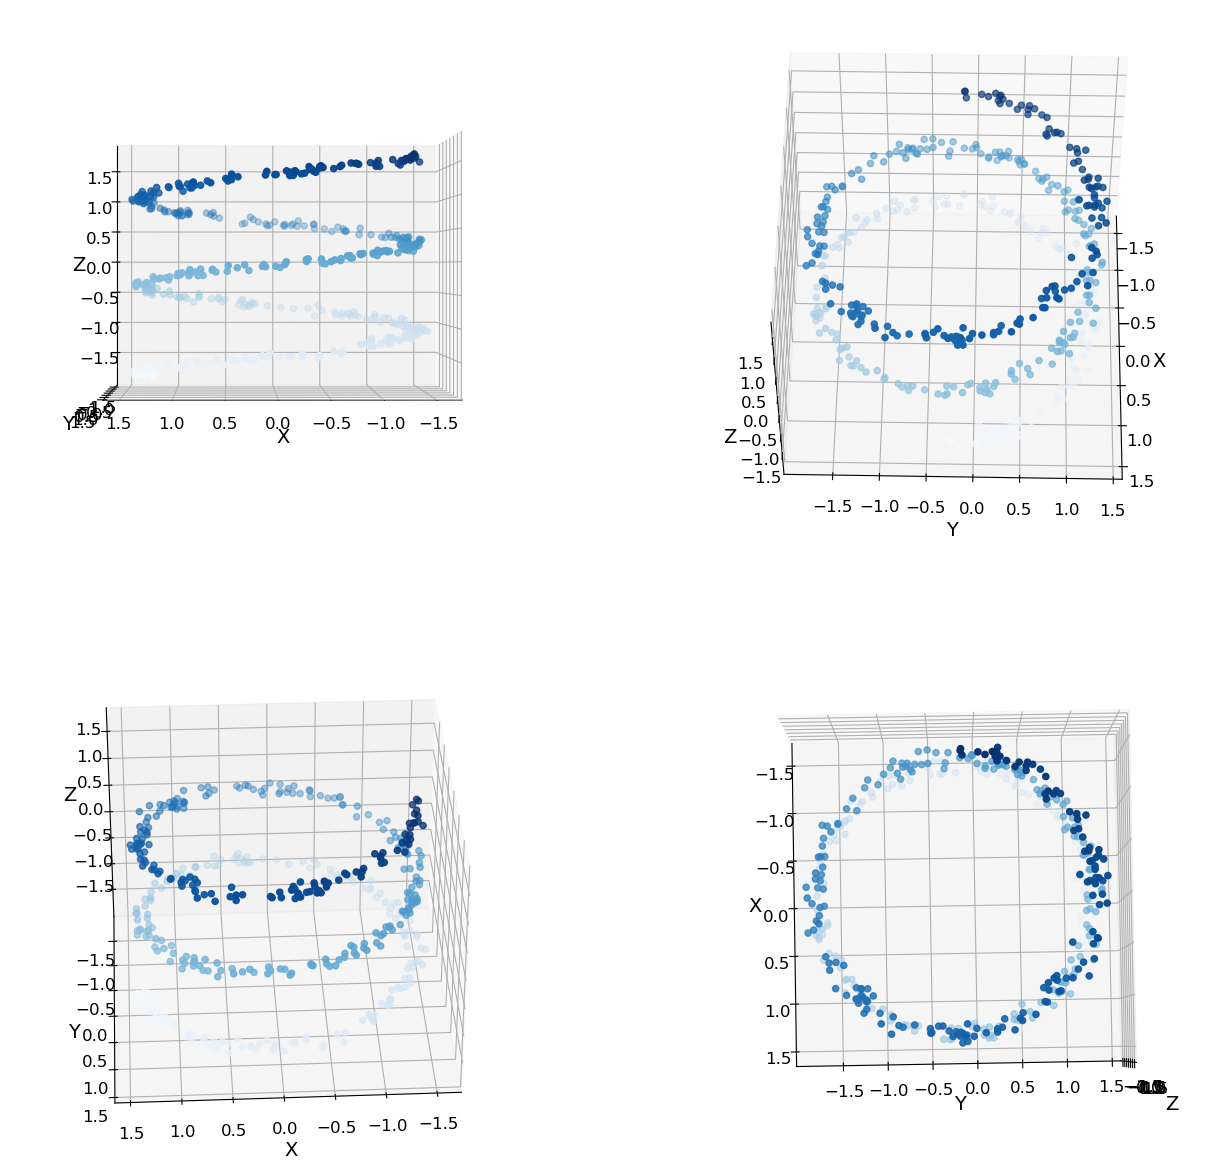

In [13]:
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
import tensorflow as tf
import keras
print('Tensorflow: ', tf.__version__, ',','keras: ', keras.__version__)

Tensorflow:  2.15.0 , keras:  2.15.0


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [17]:
X_train_scaled.dtype

dtype('float64')

In [18]:
print(X_train_scaled.shape)

(448, 2)


In [74]:
model = Sequential([
    Dense(100, input_shape= X_train_scaled.shape[1:], activation='relu'),
    Dense(50, activation='sigmoid'),
    #Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [75]:
model.layers

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               300       
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5401 (21.10 KB)
Trainable params: 5401 (21.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

In [78]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [79]:
history = model.fit(X_train_scaled, z_train_scaled, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 1.1343 - mean_squared_error: 1.1343
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0649 - mean_squared_error: 1.0649
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0307 - mean_squared_error: 1.0307
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0163 - mean_squared_error: 1.0163
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0083 - mean_squared_error: 1.0083
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0035 - mean_squared_error: 1.0035
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0014 - mean_squared_error: 1.0014
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9991 - mean_squared_error: 0.9991
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9977 - mean_squared_error: 0.9977
Epoch 10/200
14/14 

14/14 [==============================] - 0s 2ms/step - loss: 0.9744 - mean_squared_error: 0.9744
Epoch 150/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9740 - mean_squared_error: 0.9740
Epoch 151/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9740 - mean_squared_error: 0.9740
Epoch 152/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9742 - mean_squared_error: 0.9742
Epoch 153/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9738 - mean_squared_error: 0.9738
Epoch 154/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9744 - mean_squared_error: 0.9744
Epoch 155/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9740 - mean_squared_error: 0.9740
Epoch 156/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9741 - mean_squared_error: 0.9741
Epoch 157/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9741 - mean_squared_error: 0.9741
Epoch 158/200
1

In [80]:
model.evaluate(X_test_scaled, z_test_scaled)

4/4 [==============================] - 0s 3ms/step - loss: 1.0581 - mean_squared_error: 1.0581


[1.0581084489822388, 1.0581084489822388]

In [82]:
fitz = model.predict(X_train_scaled)
fit_z = pd.DataFrame(fitz)
fit_z.shape

14/14 [==============================] - 0s 2ms/step


(448, 1)

In [83]:
X_train_df = pd.DataFrame(X_train_scaled).reset_index().drop('index', axis=1)
train_df =  pd.concat([X_train_df, z_train_serie], axis=1, join="inner")
train_df.columns = [0,1,2]
train_df = train_df.rename(columns={0: "x",
                                    1: "y",
                                    2: "z"
                                   })
train_df.head()

,x,y,z
0,-0.710412,1.060069,1.484588
1,1.170909,0.597008,1.133518
2,1.348213,-0.249185,-1.747367
3,1.404941,0.126391,-1.683342
4,-0.703923,0.992957,0.091213


In [89]:
df_plot = pd.concat([train_df, fit_z], axis=1)
df_plot = df_plot.rename(columns={0: "fit_z"})
df_plot = df_plot.sort_values(by=['z'])
df_plot.head(3)

,x,y,z,fit_z
388,1.323658,-0.235210,-1.787874,0.000885
121,1.407049,-0.157347,-1.764873,0.000884
2,1.348213,-0.249185,-1.747367,0.000884


In [90]:
scat_x = df_plot.x
scat_y = df_plot.y
scat_z = df_plot.z

fit_x = scat_x
fit_y = scat_y
fit_z = df_plot.fit_z

### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

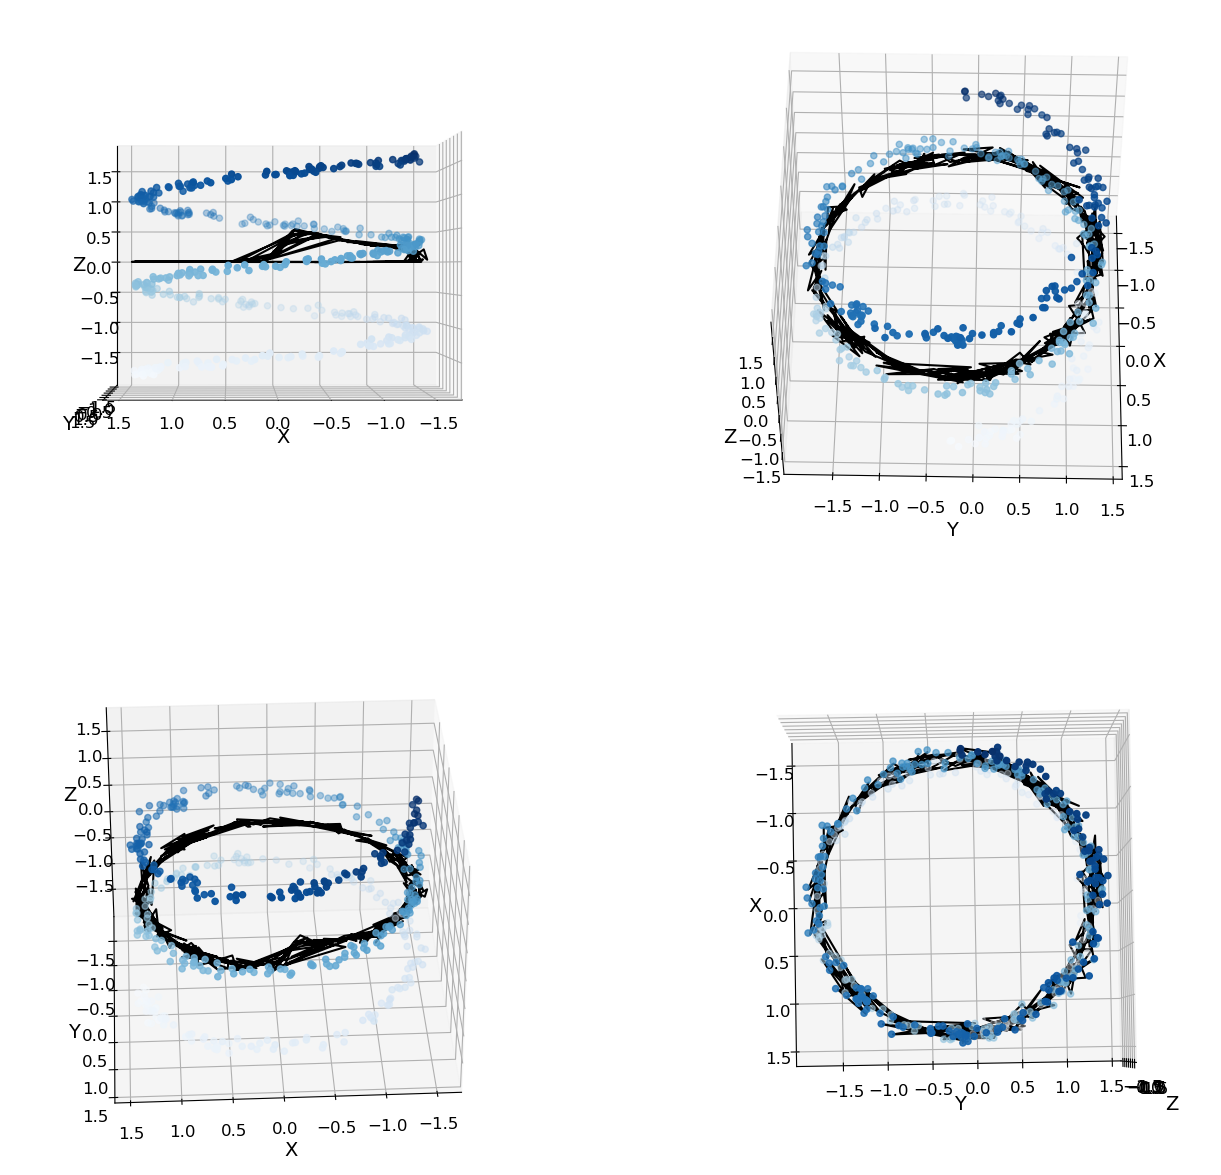

In [91]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for the model.

In [92]:
from sklearn.metrics import mean_squared_error
z_pred = model.predict(X_test_scaled)
z_pred.shape

4/4 [==============================] - 0s 2ms/step


(112, 1)

In [73]:
error = round(mean_squared_error(z_test_scaled, z_pred), 4)
error

1.0517